In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
male_data = pd.read_csv("bodyfat.csv")
male_data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
male_data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
x = male_data.drop(["BodyFat","Density"],axis = 1)
y = male_data['BodyFat']

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [9]:
fs = SelectKBest(score_func=mutual_info_regression, k=8)
fs.fit(x,y)

SelectKBest(k=8,
            score_func=<function mutual_info_regression at 0x000002572C7A9DC0>)

In [10]:
fs.scores_

array([0.08487807, 0.28709681, 0.        , 0.11066282, 0.35036448,
       0.58419418, 0.31727758, 0.28937313, 0.20887868, 0.05328539,
       0.19393853, 0.07187693, 0.08616058])

In [11]:
mi_score = pd.Series(fs.scores_, index = x.columns)
mi_score

Age        0.084878
Weight     0.287097
Height     0.000000
Neck       0.110663
Chest      0.350364
Abdomen    0.584194
Hip        0.317278
Thigh      0.289373
Knee       0.208879
Ankle      0.053285
Biceps     0.193939
Forearm    0.071877
Wrist      0.086161
dtype: float64

<AxesSubplot:>

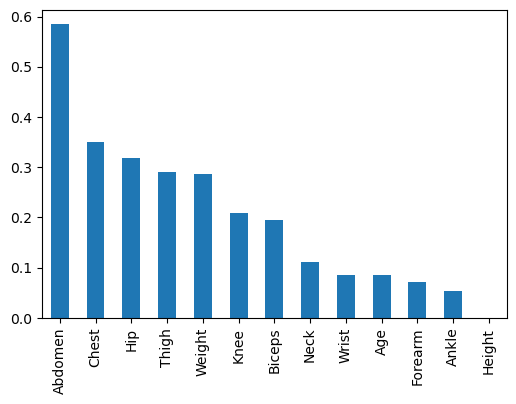

In [12]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [13]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)

In [14]:
x_selected.head()

,0,1,2,3,4,5,6,7
0,154.25,36.2,93.1,85.2,94.5,59.0,37.3,32.0
1,173.25,38.5,93.6,83.0,98.7,58.7,37.3,30.5
2,154.00,34.0,95.8,87.9,99.2,59.6,38.9,28.8
3,184.75,37.4,101.8,86.4,101.2,60.1,37.3,32.4
4,184.25,34.4,97.3,100.0,101.9,63.2,42.2,32.2


In [15]:
x.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
